### visualize image and preprocessing

In [2]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
from model import *
from PIL import Image
from dataset import *

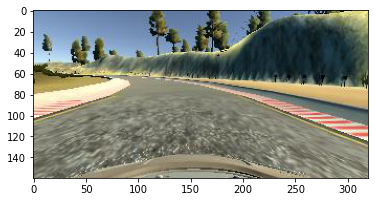

In [7]:
img = Image.open('data/new_data/IMG/center_2021_05_06_19_51_09_851.jpg')
plt.imshow(img)

#### image crop

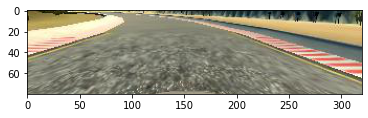

In [8]:
transform = transforms.Compose([
    transforms.Lambda(lambda img: transforms.functional.crop(img, 60, 0, 80, 320))
])
cropped_img = transform(img)
plt.imshow(cropped_img)

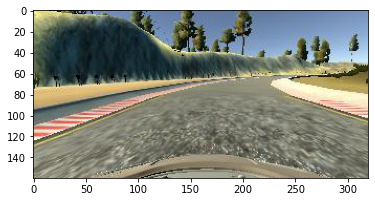

In [9]:
img_flipped = transforms.functional.hflip(img)
plt.imshow(img_flipped)

In [4]:
img_tensor = transforms.ToTensor()(cropped_img)
img_tensor

tensor([[[0.6824, 0.6863, 0.6941,  ..., 0.5608, 0.6039, 0.7216],
         [0.7020, 0.7020, 0.6980,  ..., 0.6157, 0.6000, 0.6863],
         [0.7255, 0.7176, 0.7059,  ..., 0.8000, 0.7843, 0.8039],
         ...,
         [0.3686, 0.3765, 0.3922,  ..., 0.5059, 0.5451, 0.6000],
         [0.3412, 0.6118, 0.7647,  ..., 0.5922, 0.5451, 0.5059],
         [0.6353, 0.4941, 0.3608,  ..., 0.6275, 0.5882, 0.5725]],

        [[0.5569, 0.5608, 0.5686,  ..., 0.5333, 0.5765, 0.6902],
         [0.5922, 0.5922, 0.5882,  ..., 0.5961, 0.5804, 0.6667],
         [0.6431, 0.6353, 0.6235,  ..., 0.7843, 0.7647, 0.7843],
         ...,
         [0.3569, 0.3686, 0.3765,  ..., 0.4431, 0.4824, 0.5373],
         [0.3176, 0.5882, 0.7412,  ..., 0.5255, 0.4784, 0.4392],
         [0.6000, 0.4588, 0.3255,  ..., 0.5608, 0.5216, 0.5059]],

        [[0.3333, 0.3373, 0.3451,  ..., 0.1255, 0.1686, 0.2941],
         [0.3451, 0.3451, 0.3412,  ..., 0.2275, 0.2235, 0.3098],
         [0.3176, 0.3098, 0.2980,  ..., 0.4980, 0.4980, 0.

### test model

In [5]:
model = LeNetRevised()
model.load_state_dict(torch.load('checkpoint/model.pth'))
model.eval()
test_transform = transforms.Compose([
    transforms.CenterCrop((120, 320)),
    transforms.ToTensor()
])
test_image = Image.open('data/IMG/center_2016_12_01_13_30_48_287.jpg')
output = model(test_transform(test_image).unsqueeze(0))

In [6]:
output

tensor([[0.0032]], grad_fn=<AddmmBackward>)

In [7]:
output.dtype

torch.float32

In [8]:
output.item()

0.0031860326416790485

### print model

In [2]:
print(LeNetRevised())

LeNetRevised(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=20944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=1, bias=True)
)


In [3]:
net = LeNetRevised()
img_input = torch.randn([1, 3, 80, 320])
output = net(img_input)

torch.Size([1, 6, 76, 316])
torch.Size([1, 6, 38, 158])
torch.Size([1, 16, 34, 154])
torch.Size([1, 16, 17, 77])
torch.Size([1, 20944])
torch.Size([1, 120])
